# Advertising - Logistic Regression Project

**I am going to be exploring the Advertising dataset from Kaggle, as well as developing a predictive model using logistic regression.**
**In this dataset, I will try to predict if a given internet user will click on an advertisement based on a given set of features.**
**I will divide this project into sections, so that anyone looking for a particular portion of this project can have an easier time locating it.**
1. Imports and Data Wrangling
2. Exploratory Data Analysis/Visualizations
3. Model Training/Testing
4. Conclusions

# 1. Imports and Data Wrangling

In [24]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Here I will retrieve the data. We note that the data has the following qualitative features:**
* Ad Topic Line: Headline of the advertisement
* City: City of consumer
* Country: Country of consumer
* Timestamp: Time at which consumer clicked on Ad or closed window
* Male: Whether or not consumer was male

**The quantitative features are as follows:**
* Daily Time Spent on Site: consumer time on site in minutes
* Age: cutomer age in years
* Area Income: Avg. Income of geographical area of consumer
* Daily Internet Usage: Avg. minutes a day consumer is on the internet
* Clicked on Ad: 0 or 1 indicated clicking on Ad


In [4]:
ad_data = pd.read_csv('advertising.csv')

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data['Country'].nunique()

237

**For this project, I will only be interested in the quantitative features, along with the Male feature. I will omit City, Country, and Timestamp**

In [5]:
ad_data = ad_data.drop(['City','Country','Ad Topic Line','Timestamp'], axis=1)

In [7]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


**Let's take a look at some basic descriptive statistics to see how our features are distributed.**

In [8]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


**The first thing I notice is that the Area Income has a very wide range. I may consider transforming this column, perhaps by taking the logarithm, if the predictive power of my model is not sufficient.**

# 2. Exploratory Data Analysis/Visualizations

**Let's begin by first checking the distribution of the dependent variable 'Clicked on Ad'.**

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

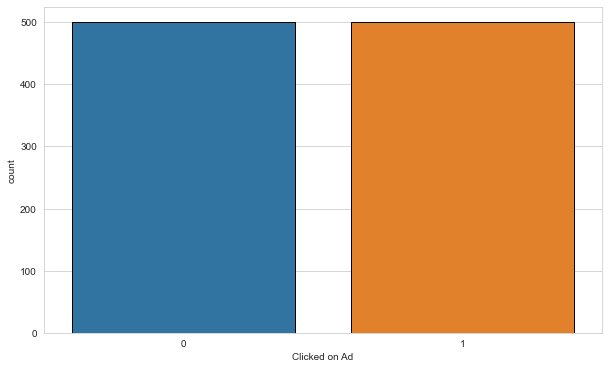

In [66]:
plt.figure(figsize=(10,6))
sns.countplot(ad_data['Clicked on Ad'], edgecolor='black')

**It looks like our dataset has an even distribution for the dependent variable, but let's verify.**

In [64]:
ad_data['Clicked on Ad'].sum()

500

**Since there are 1000 entries, and the sum of the Clicked on Ad column is 500, we know that there are in fact an equal amount of users who clicked on the ad versus did not click on the ad in our dataset.**

**Now let us check to see how the age of our users is distributed.**

<AxesSubplot:xlabel='Age'>

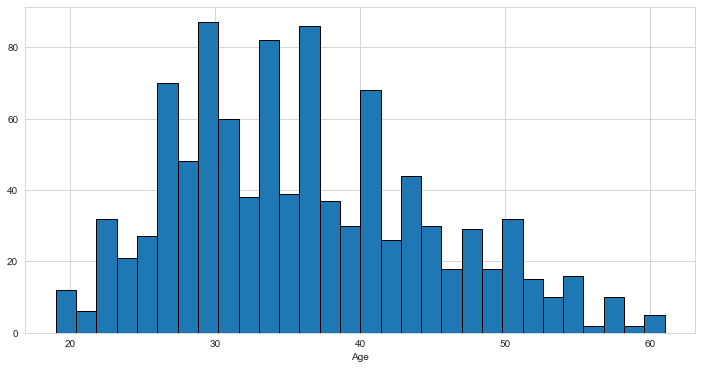

In [28]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.distplot(ad_data['Age'], bins=30, kde=False, hist_kws={'alpha':1, 'edgecolor':'black'})

**It looks like the majority of our users fall between 28 and 42. Let's check to see if there is a correlation between the users age and whether or not they clicked on the advertisement.**

In [38]:
ad_data[['Age','Clicked on Ad']].corr()

,Age,Clicked on Ad
Age,1.000000,0.492531
Clicked on Ad,0.492531,1.000000


**It looks like we do in fact see some positive correlation between Age and Clicked on Ad. This variable will most likely be an important feature to include in our model.**

**Now I want to check to see if there is a relationship between gender and whether or not the user clicked on the advertisement. note that our Male column is dummified, so a value of 1 means the user is a Male and a value of 0 means the user is a Female.**

<AxesSubplot:xlabel='Male', ylabel='count'>

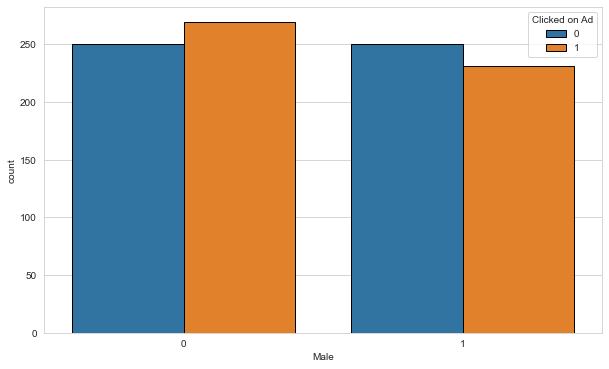

In [67]:
plt.figure(figsize=(10,6))
sns.countplot(x='Male', data=ad_data, hue='Clicked on Ad', edgecolor='black')

**It doesn't appear that there is much association between a user's gender and whether or not they clicked on the advertisement. Let's verify this by checking the correlation.**

In [17]:
ad_data[['Male','Clicked on Ad']].corr()

,Male,Clicked on Ad
Male,1.000000,-0.038027
Clicked on Ad,-0.038027,1.000000


**Our hunch was correct. There is an almost non-zero correlation between a user's gender and whether they clicked the ad. This might be a feature that we can eliminate from our model.**

**Now let's see if we can get a visualize the association between the time a user spent on the site and whether or not the user clicked on the advertisement.**

<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Clicked on Ad'>

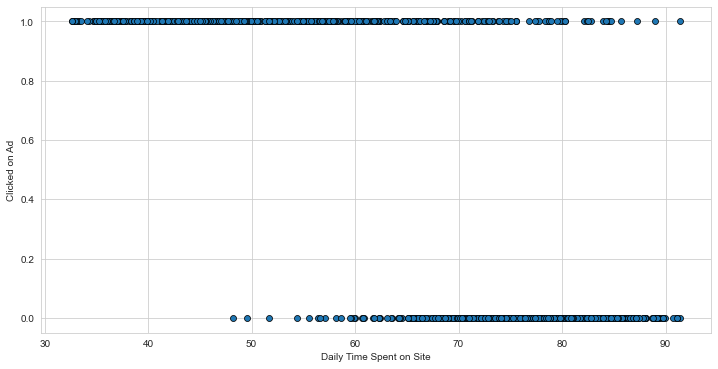

In [68]:
plt.figure(figsize=(12,6))
sns.scatterplot(ad_data['Daily Time Spent on Site'], ad_data['Clicked on Ad'], edgecolor='black')

**It looks like we have a negative correlation between Daily Time Spent on Site and Clicked on Ad, as there appear to be more users who clicked on the advertisement with a lower time spent. Let's check the correlation**

In [33]:
ad_data[['Daily Time Spent on Site','Clicked on Ad']].corr()

,Daily Time Spent on Site,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.748117
Clicked on Ad,-0.748117,1.000000


**It looks like there is in fact a very strong, negative correlation between Daily Time Spent on Site and Clicked on Ad. This is a feature we will almost definitely need to include in our model.**

**Next I want to check to see if there is an association between a user's estimated income and whether or not they clicked on the advertisement.**

<AxesSubplot:xlabel='Area Income', ylabel='Clicked on Ad'>

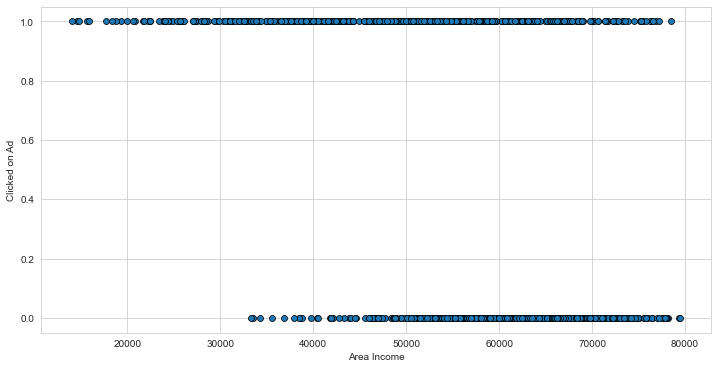

In [70]:
plt.figure(figsize=(12,6))
sns.scatterplot(ad_data['Area Income'], ad_data['Clicked on Ad'], edgecolor='black')

**At first glance it appears that the users who did not click on the advertisement were more likely to have a higher income. Let's verify this by checking the correlation.**

In [36]:
ad_data[['Area Income','Clicked on Ad']].corr()

,Area Income,Clicked on Ad
Area Income,1.000000,-0.476255
Clicked on Ad,-0.476255,1.000000


**There is in fact a negative correlation between Area Income and Clicked on Ad. We will most likely want to include this feature in our model.**

**The final correlation we will check is between Daily Internet Usage and Clicked on Ad. This will show if there is an association between how long someone spends on the internet and whether or not they were likely to click on the advertisement.**

<AxesSubplot:xlabel='Daily Internet Usage', ylabel='Clicked on Ad'>

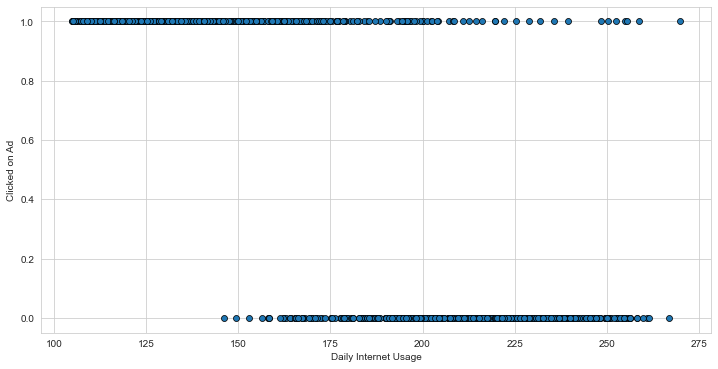

In [74]:
plt.figure(figsize=(12,6))
sns.scatterplot(ad_data['Daily Internet Usage'], ad_data['Clicked on Ad'], edgecolor='black')

**It looks like there is a negative correlation between daily internet usage and whether or not a user clicked on the advertisement, as more of the users who did not click on the ad are centered around a higher internet usage time. Let's verify this by checking the correlation.**

In [39]:
ad_data[['Daily Internet Usage','Clicked on Ad']].corr()

,Daily Internet Usage,Clicked on Ad
Daily Internet Usage,1.000000,-0.786539
Clicked on Ad,-0.786539,1.000000


**There is in fact a strong, negative correlation between Daily Internet Usage and Clicked on Ad. This will be a feature that I definitely need to include in my model, provided there are no issues of multicollinearity.**

**Now that I have checked the correlation between each feature with the dependent variable, it is time to check to see if there is any correlation between the features themselves. Instead of using a PairPlot to produce a grid of scatterplots like I did in my Linear Regression project, I will instead use a heatmap in order to check the correlations between each feature**

<AxesSubplot:>

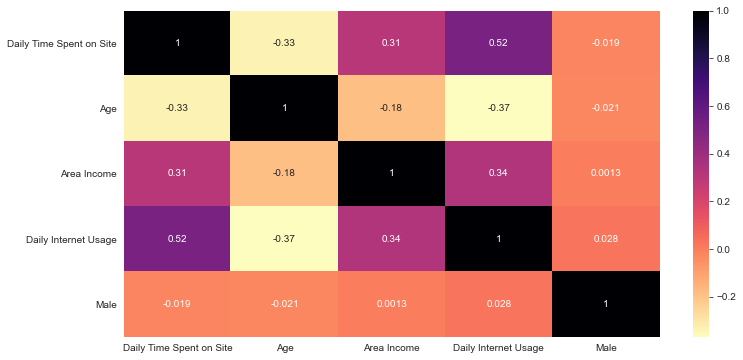

In [47]:
plt.figure(figsize=(12,6))
sns.heatmap(ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']].corr(), 
            annot=True, cmap='magma_r')

**Note that there is a positive correlation between Daily Internet Usage and Daily Time Spent on Site, as well as some slight correlation between Age and Daily Time Spent on Site/Daily Internet Usage. I will compute the VIF for each variable to see if we have any multicollinearity present**

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)
X = ad_data.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Daily Time Spent on Site,22.802493
1,Age,8.670393
2,Area Income,18.585312
3,Daily Internet Usage,23.488407
4,Male,1.902386


**It looks like there is in fact some multicollinearity present. As such, my first model will be done with StatsModels in order to perform a backwards selection and drop any redundent features. My first thought, at this moment, is that we can either drop one of Daily Internet Usage or Daily Time Spent on Site, or perhaps combine them into a percentage of internet time spent on site feature.**

# 3. Model Training/Testing

**Imports**

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

**I will now train and test a Logistic Regression model using two frameworks. I will first use StatsModels, followed by sklearn**

**Before I develop my models, I will first split my dataset into train/test datasets using sklearn**

In [76]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## 3.1 Logistic Regression using StatsModels with Backwards Selection

**In developing this model, I will be using a significance level of 0.05. As such, as features which have a p-value of greater than 0.05 will be eliminated from my model.**

In [80]:
model = sm.Logit(y_train, X_train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.281748
         Iterations 7


In [82]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:          Clicked on Ad   No. Observations:                  700
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                            4
Date:                Sat, 24 Oct 2020   Pseudo R-squ.:                  0.5934
Time:                        18:06:01   Log-Likelihood:                -197.22
converged:                       True   LL-Null:                       -485.06
Covariance Type:            nonrobust   LLR p-value:                2.842e-123
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Daily Time Spent on Site    -0.0511      0.009     -5.569      0.000      -0.069      -0.033
Age                          0.2363      0.018     13.077      0.000       0.201       0.

**As we can see, the feature Male has a p-value higher than our preferred significance level of 0.05. We should drop this feature as the first iteration of our backwards selection.**

In [90]:
model = sm.Logit(y_train, X_train.drop(['Male'],axis=1))
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.281751
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          Clicked on Ad   No. Observations:                  700
Model:                          Logit   Df Residuals:                      696
Method:                           MLE   Df Model:                            3
Date:                Sat, 24 Oct 2020   Pseudo R-squ.:                  0.5934
Time:                        18:19:30   Log-Likelihood:                -197.23
converged:                       True   LL-Null:                       -485.06
Covariance Type:            nonrobust   LLR p-value:                1.891e-124
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Daily Time Spent on Site    -0.0512      0.009     -5.577      0.000      -0.069

**The next feature I will eliminate is Area Income, as the p-value of 0.284 is higher than my chosen significance level of 0.05.**

In [100]:
model = sm.Logit(y_train, X_train.drop(['Area Income','Male'],axis=1))
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.282578
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          Clicked on Ad   No. Observations:                  700
Model:                          Logit   Df Residuals:                      697
Method:                           MLE   Df Model:                            2
Date:                Sat, 24 Oct 2020   Pseudo R-squ.:                  0.5922
Time:                        19:51:25   Log-Likelihood:                -197.80
converged:                       True   LL-Null:                       -485.06
Covariance Type:            nonrobust   LLR p-value:                1.759e-125
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Daily Time Spent on Site    -0.0533      0.009     -5.959      0.000      -0.071

**Now that all of the features which did not meet our level of significance have been dropped, we are now ready to test our model.**

In [104]:
y_pred = result.predict(X_test.drop(['Male', 'Area Income'], axis=1))
y_pred = y_pred.apply(lambda x: 1 if x > 0.5 else 0)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[149   8]
 [ 15 128]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



**As we can see here, our model has a average precision of 0.92. This indicates that our model is quite accurate in predicting whether or not a given user will click on an ad based on Age, Daily Internet Usage, and Daily Time Spent on Site.**

## 3.2 Logistic Regression using sklearn

**I will now create and instance of the LogisticRegression object from sklearn, and fit the model's parameters using my previously created training dataset, with all features included.**

In [113]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

**Now that the model has been trained, I will use my test dataset in order to test the predictive power of my model.**

In [114]:
predictions = model.predict(X_test)

**Similarly to what I did for the model built with the StatsModels api, I will test the accuracy of my model using sklearn's confusion matrix and classification report tools**

In [115]:
print(confusion_matrix(y_test, predictions))

[[149   8]
 [ 14 129]]


In [116]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



**As we can see, our model has an accuracy of 93%, which is 1% better than our model we built using StatsModels. However, this model was built without using backwards selection, which is a very import method when we have datasets with many features.**

# 4. Conclusions

**When comparing our two models, it is import to note that our model built using StatsModels is only utilizing 3 features, while our model built using sklearn is using all the features. While that may not make a difference for this particular artificial dataset, in real life we will almost always want to use a feature selection method in order to reduce the number of features included in our model.**

**While this artificial dataset did not, in theory, require us to eliminate any features using either backward or forward selection, I personally feel it was important to demonstrate how to use one of those methods, as many real life datasets contain far more features than the amount present in this dataset.**